In [1]:
# IMPORT MODULES

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# LOAD THE MNIST DATA

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
x_train.shape

(60000, 28, 28)

In [0]:
# NORMALIZATION: CONVERTING PIXELS OF RANGE O TO 255, TO RANGE OF 0 TO 1

x_train = x_train / 255
x_test = x_test / 255 

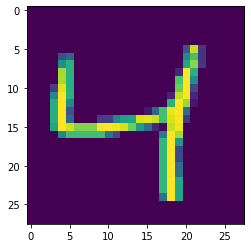

In [6]:
# SAMPLE; RANDOM IMAGE FROM TRAIN IMAGES (x_train)

plt.imshow(x_train[2])
plt.show()

In [0]:
# CREATING MODEL

model = tf.keras.Sequential([
                             keras.layers.Flatten(input_shape=(28,28)),
                             keras.layers.Dense(128, activation='relu'),
                             keras.layers.Dense(10)])

In [0]:
# ADDING OPTIMIZER, DEALING WITH LOSSES AND ADDING METRICS

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# TRAINING MODEL

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1103 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0766 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0569 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0435 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0279 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0182 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0161 - accuracy: 0.9948


In [10]:
(test_loss, test_accuracy) = model.evaluate(x_test, y_test, verbose=2)
print(test_accuracy * 100) # RETURN AS PERCENTAGE ON 100 AND NOT DECIMAL

313/313 - 0s - loss: 0.0806 - accuracy: 0.9776
97.75999784469604


In [0]:
# CREATE PROBABILITY MODEL WITH SOFTMAX TO DEAL WITH OUTLIER DATA

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) 

In [0]:
# PREDICTING FROM PROBABILITY MODEL

predictions = probability_model.predict(x_test)

In [13]:
predictions[0]

array([3.6184989e-12, 1.9503767e-13, 2.1557238e-08, 2.6237221e-06,
       9.0634362e-14, 1.1844666e-10, 8.7535784e-13, 9.9999738e-01,
       9.0087805e-11, 6.1040053e-09], dtype=float32)

In [14]:
# np.argmax() USED TO RETURN INDEX OF MOST CONFIDENT PREDICTION (HERE, THE NUMBER IT HAS PREDICTED) 

np.argmax(predictions[0])

7

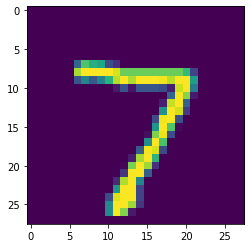

In [15]:
# EXTRA; PLOTTING THE IMAGE THAT HAS JUST BEEN PREDICTED

plt.imshow(x_test[0])
plt.show()